# Compare Throughputs

- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : February 14th 2023
- last update : February 14th 2023

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys,re

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline
import pickle
import seaborn as sns
import copy
from collections import OrderedDict

In [2]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [3]:
import time
from datetime import datetime,date
from astropy.time import Time
import dateutil.parser
import pytz

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

# Config

In [5]:
DATE=20230118

In [6]:
filenames_from_bouguerlines = [
"MLfit_bouguer_linearfit-20230118-OG550_65mm_1~holo4_003-config_PSF2DFFM-REBIN2_bin10nm_out.csv",
"MLfit_bouguer_linearfit-20230118-OG550_65mm_1~holo4_003-config_PSF2DFFM-REBIN2_bin30nm_out.csv",
"MLfit_bouguer_linearfit-20230118-empty~holo4_003-config_PSF2DFFM-REBIN2_bin10nm_out.csv",
"MLfit_bouguer_linearfit-20230118-empty~holo4_003-config_PSF2DFFM-REBIN2_bin30nm_out.csv",
]

In [7]:
tags_from_bouguerlines = ["filter OG550, bin 10nm","filter OG550, bin 30nm" ,"no filter, bin 10nm","no filter, bin 30nm"]

In [8]:
all_dfs_from_bouguerlines = []
for filename in filenames_from_bouguerlines:
    all_dfs_from_bouguerlines.append(pd.read_csv(filename))

In [9]:
NFB = len(all_dfs_from_bouguerlines)

In [11]:
all_dfs_from_bouguerlines[0].head()

,Unnamed: 0,wavelength,throu,errthrou,sedtoa,errsedtoa
0,0,500.000000,0.000021,0.000008,1.464011e-15,5.211551e-16
1,1,511.224490,0.000017,0.000008,2.345649e-15,1.058902e-15
2,2,522.448980,0.000563,0.000183,7.066771e-14,2.293725e-14
3,3,533.673469,0.011582,0.001579,1.342993e-12,1.830481e-13
4,4,544.897959,0.054547,0.002633,5.817372e-12,2.807937e-13


In [12]:
hls_colors = sns.color_palette("hls", NFB)

Text(0.5, 0, '$\\lambda$  (nm)')

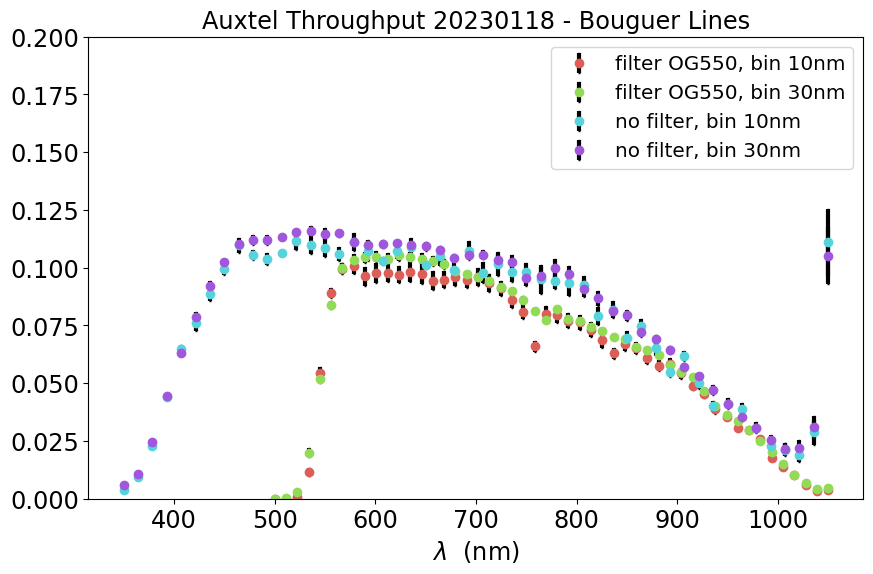

In [13]:
for idx in range(NFB):
    X=all_dfs_from_bouguerlines[idx].wavelength
    Y=all_dfs_from_bouguerlines[idx].throu
    EY=all_dfs_from_bouguerlines[idx].errthrou

    plt.errorbar(X,Y, yerr=EY, xerr=None, fmt='o',color=hls_colors[idx],ecolor="k", elinewidth=3, capsize=1,label=tags_from_bouguerlines[idx])


plt.legend(loc="upper right")
    
plt.ylim(0,0.2)
plt.title(f"Auxtel Throughput {DATE} - Bouguer Lines")
plt.xlabel("$\lambda$  (nm)")

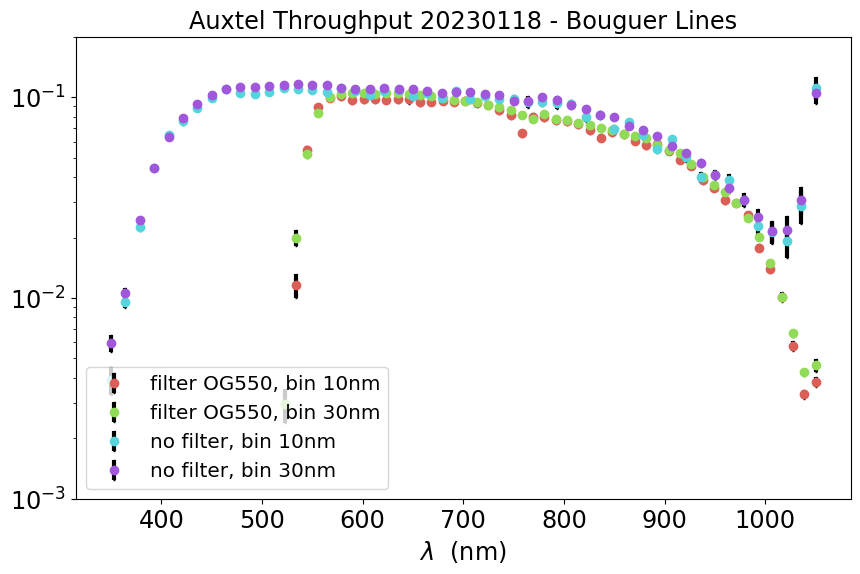

In [14]:
for idx in range(NFB):
    X=all_dfs_from_bouguerlines[idx].wavelength
    Y=all_dfs_from_bouguerlines[idx].throu
    EY=all_dfs_from_bouguerlines[idx].errthrou

    plt.errorbar(X,Y, yerr=EY, xerr=None, fmt='o',color=hls_colors[idx],ecolor="k", elinewidth=3, capsize=1,label=tags_from_bouguerlines[idx])


plt.legend(loc="upper right")
    
plt.ylim(0,0.2)
plt.title(f"Auxtel Throughput {DATE} - Bouguer Lines")
plt.xlabel("$\lambda$  (nm)")
plt.yscale('log')
plt.ylim(1e-3,0.2)
plt.legend(loc="lower left")